In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mn
import plotly.graph_objects as go
from plotly.subplots import make_subplots

**EDA - Exploratory Data Analysis on Data helps in understanding the data with intrinsic knowledge and facilitates ease of working with the data.**

**In our dataset, that we acquired by data collection through Google form, we apply the concepts of EDA to gain insights in the trend of how Music and Mental Health are related. This will further help us recognize and device a plan of action to execute our idea for deployment of our project by building a model which helps individuals understand their mental health status and try to improve it with the help of music.**

# **Analysis of Respones**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/EDA+DPL/Final_responses.csv")
df.head()

,Unnamed: 0,Timestamp,age,primary_streaming_platform,hours_spent,music_while_working,favorite_genre,explore_genres,other_genres,other_languages,...,Korean,Tamil,Telegu,Malayalam,French,Portugese,Chinese,No other language,persistent_state_of_worry_panic_fear,persistent_sadness_tiredness_loss_of_interest
0,0,2023-09-02 20:21:53.727,18,Spotify,3.0,Yes,Pop,Sometimes,"Pop, Bollywood, Hip-Hop/Rap, R&B (Rhythm and B...",Punjabi,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mild,normal
1,1,2023-09-02 20:22:14.115,19,Apple Music,3.0,Yes,Hip-Hop/Rap,Sometimes,"Pop, Bollywood, Electronic/Dance",Punjabi,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none,normal
2,2,2023-09-02 20:23:07.010,18,Spotify,1.0,No,Pop,Sometimes,"Bollywood, Classical",No other language,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,moderate,normal
3,3,2023-09-02 20:23:17.846,19,Spotify,4.0,No,R&B (Rhythm and Blues),Yes,"Pop, Bollywood, Electronic/Dance, Classical","Punjabi, Korean",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,severe,severe
4,5,2023-09-02 20:24:09.217,18,Spotify,2.0,No,indie,Sometimes,"Bollywood, Hip-Hop/Rap",Spanish,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mild,normal


In [ ]:
del df['Unnamed: 0']
del df['permissions']

In [ ]:
df.shape

(497, 37)

In [ ]:
df.isna().sum()

Timestamp                                        0
age                                              0
primary_streaming_platform                       0
hours_spent                                      0
music_while_working                              0
favorite_genre                                   0
explore_genres                                   0
other_genres                                     0
other_languages                                  0
anxiety_level                                    0
depression_level                                 0
insomnia_level                                   0
ocd_level                                        6
music_effects                                    0
Pop                                              0
Bollywood                                        0
Hip-Hop/Rap                                      0
Rock                                             0
Devotional                                       0
Classical                      

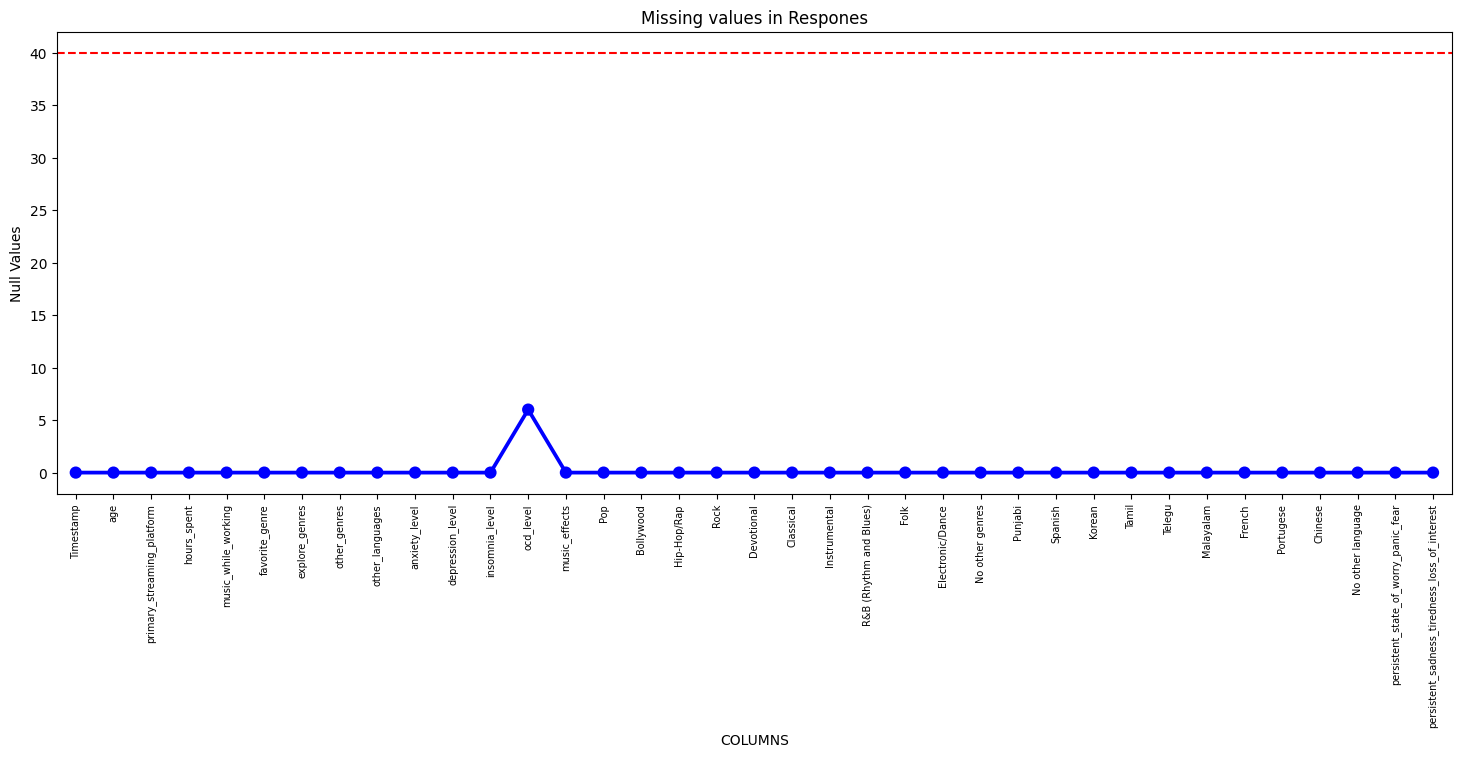

In [ ]:
null_df = pd.DataFrame((df.isnull().sum())).reset_index()
null_df.columns = ['Column Name', 'Null Values']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values",data=null_df,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Missing values in Respones")
plt.ylabel("Null Values")
plt.xlabel("COLUMNS")
plt.show()

<Axes: >

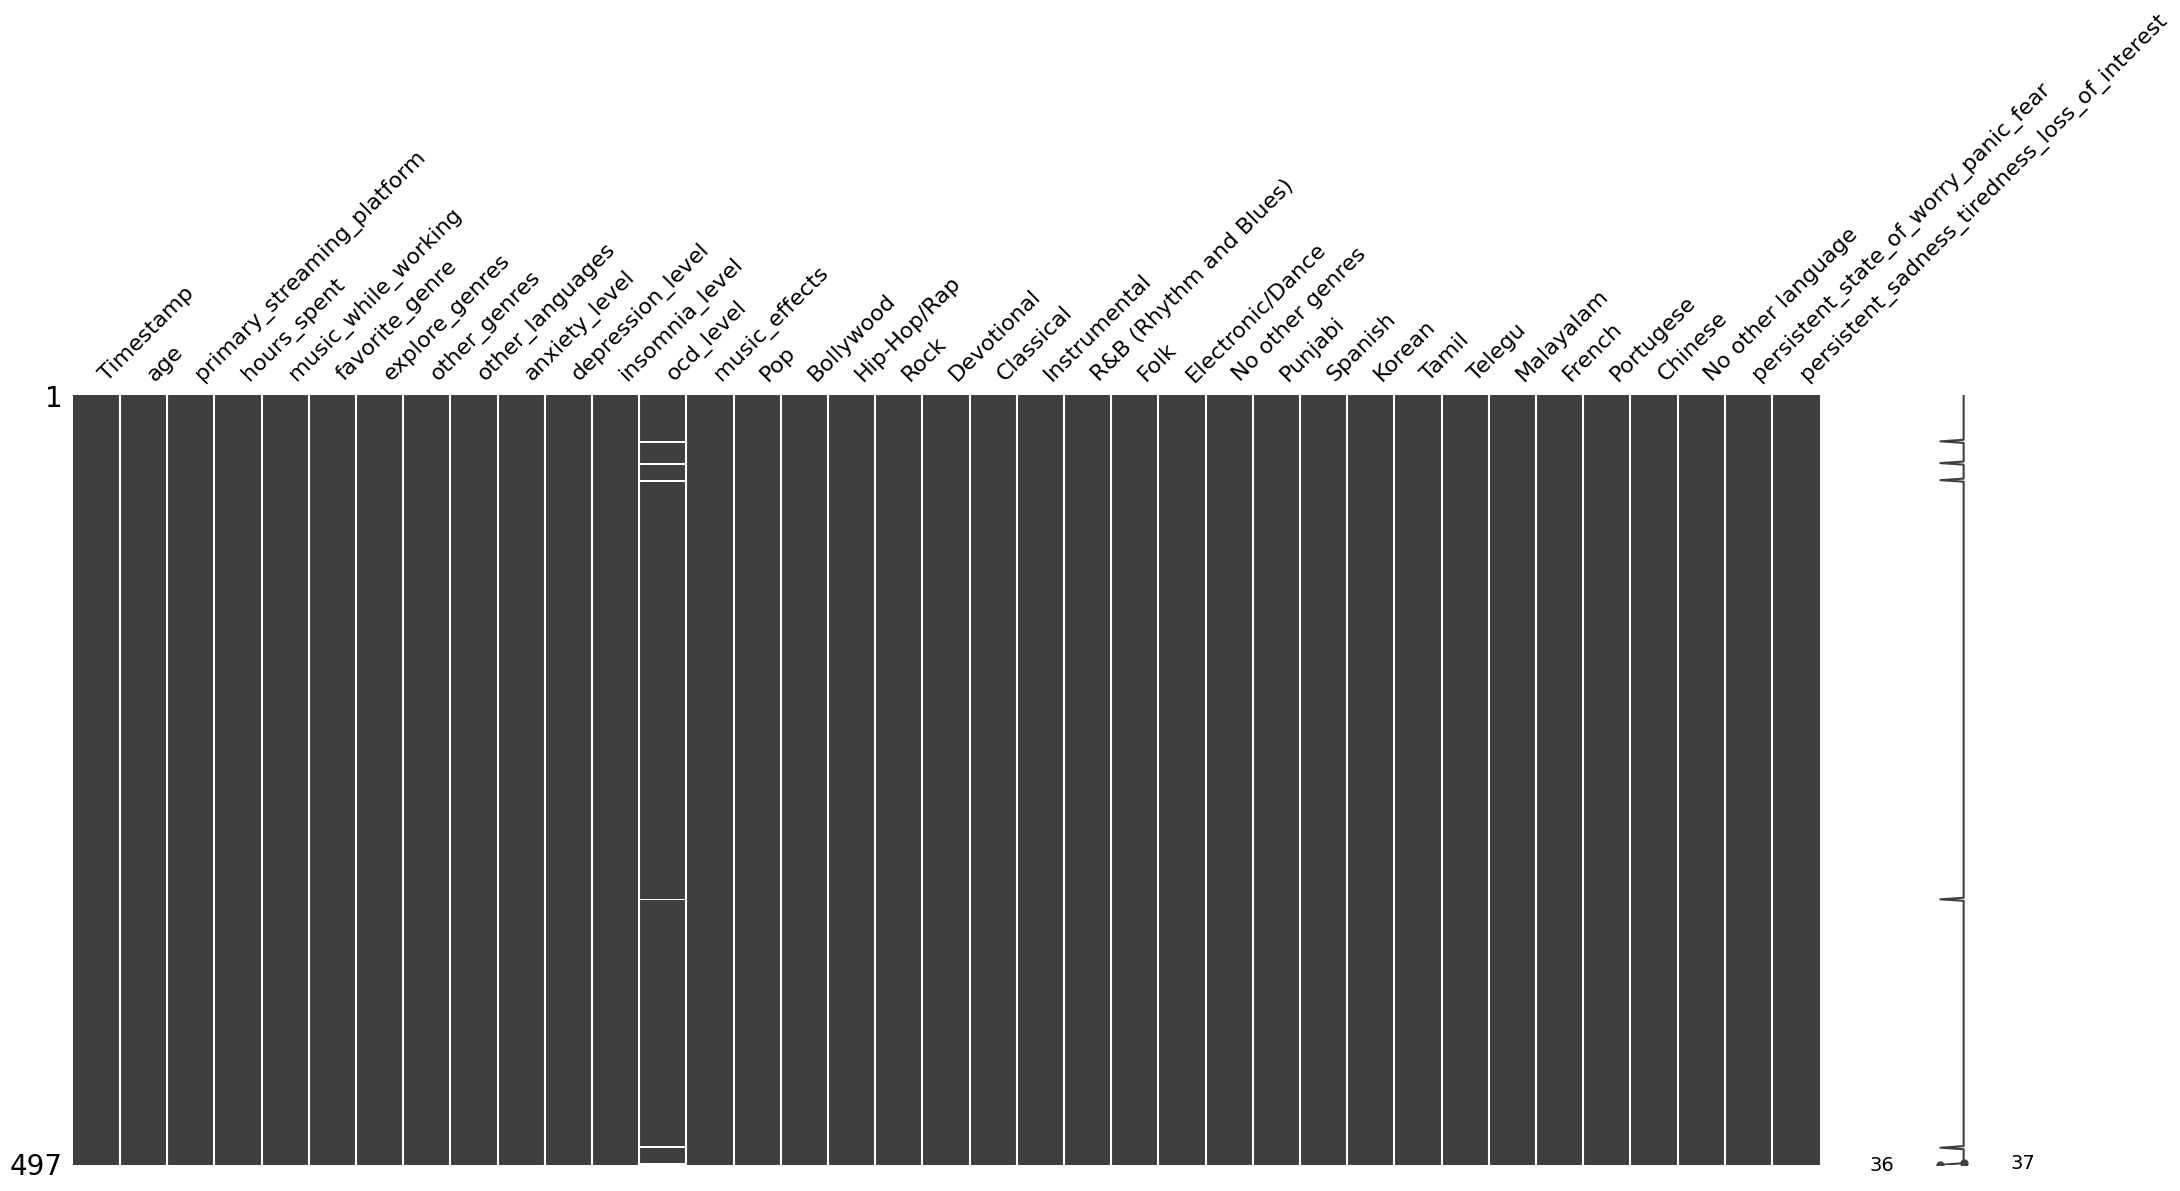

In [ ]:
mn.matrix(df)

In [ ]:
df['ocd_level'].fillna(0, inplace=True)

In [ ]:
df.isna().sum()

Timestamp                                        0
age                                              0
primary_streaming_platform                       0
hours_spent                                      0
music_while_working                              0
favorite_genre                                   0
explore_genres                                   0
other_genres                                     0
other_languages                                  0
anxiety_level                                    0
depression_level                                 0
insomnia_level                                   0
ocd_level                                        0
music_effects                                    0
Pop                                              0
Bollywood                                        0
Hip-Hop/Rap                                      0
Rock                                             0
Devotional                                       0
Classical                      

<Axes: >

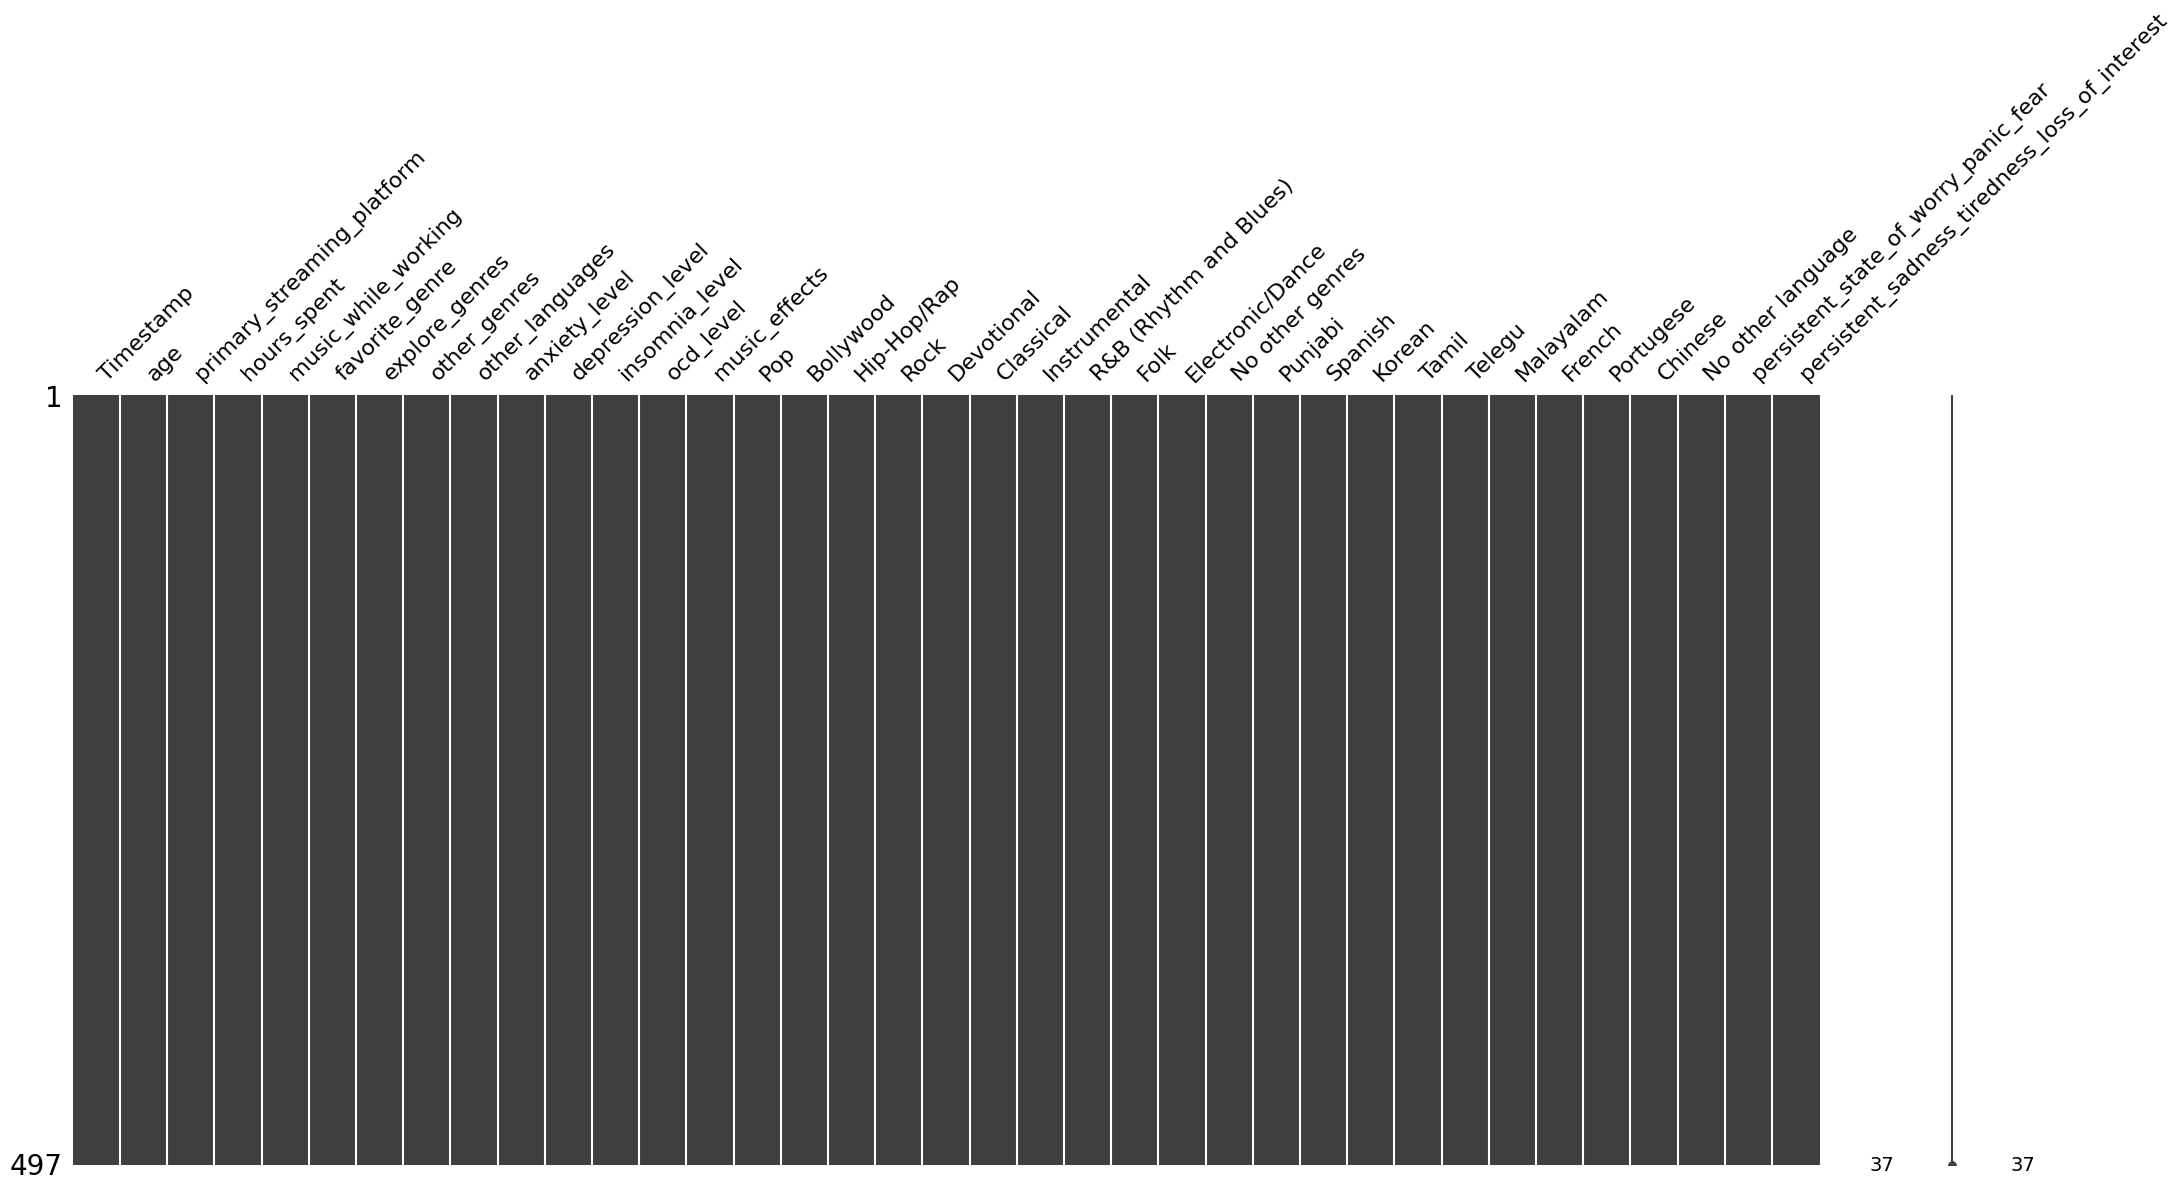

In [ ]:
mn.matrix(df)

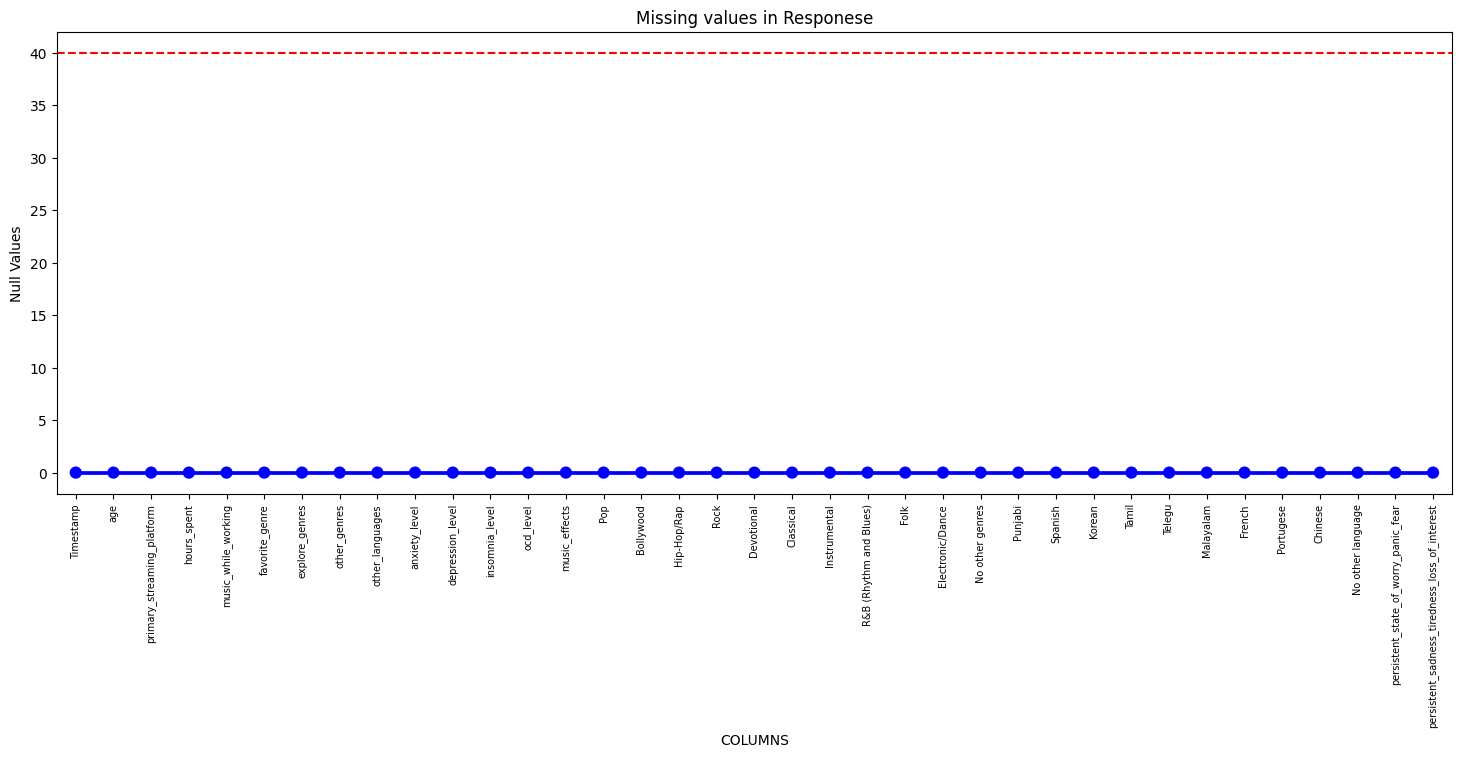

In [ ]:
null_df = pd.DataFrame((df.isnull().sum())).reset_index()
null_df.columns = ['Column Name', 'Null Values']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values",data=null_df,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Missing values in Responese")
plt.ylabel("Null Values")
plt.xlabel("COLUMNS")
plt.show()

We identified the missing vaules (null values) in the OCD level column and applied preprocessing to them.

## **EDA for Responses**

**Description of Data**

In [ ]:
df.describe()

,age,hours_spent,anxiety_level,depression_level,insomnia_level,ocd_level,Pop,Bollywood,Hip-Hop/Rap,Rock,...,Punjabi,Spanish,Korean,Tamil,Telegu,Malayalam,French,Portugese,Chinese,No other language
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,...,497.000000,497.000000,497.000000,497.000000,497.000000,497.00000,497.000000,497.000000,497.000000,497.000000
mean,34.575453,1.627458,3.993964,2.637827,2.402414,2.416499,0.261569,0.366197,0.225352,0.243461,...,0.478873,0.112676,0.102616,0.080483,0.096579,0.05835,0.048290,0.006036,0.014085,0.362173
std,14.394459,1.427306,2.876133,2.835123,2.764812,2.913672,0.439932,0.482250,0.418235,0.429603,...,0.500057,0.316515,0.303762,0.272313,0.295682,0.23464,0.214594,0.077536,0.117958,0.481113
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,1.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,2.000000,6.000000,5.000000,5.000000,5.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
max,69.000000,8.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


**Information of Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Timestamp                                      497 non-null    object 
 1   age                                            497 non-null    int64  
 2   primary_streaming_platform                     497 non-null    object 
 3   hours_spent                                    497 non-null    float64
 4   music_while_working                            497 non-null    object 
 5   favorite_genre                                 497 non-null    object 
 6   explore_genres                                 497 non-null    object 
 7   other_genres                                   497 non-null    object 
 8   other_languages                                497 non-null    object 
 9   anxiety_level                                  497 non

**Correlation Matrix for Numeric Data**

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a correlation heatmap using Plotly
fig = px.imshow(corr_matrix,
                x=corr_matrix.columns,
                y=corr_matrix.index,
                color_continuous_scale='RdBu')

fig.update_layout(title='Correlation Heatmap for Numerical Data')

fig.show()

<ipython-input-15-9f47cb5e5ebf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


**Changing the categories to numeric data**

In [ ]:
df1 = df.copy()

In [ ]:
# For persistent_state_of_worry_panic_fear column

df1.persistent_state_of_worry_panic_fear.value_counts()

moderate    161
mild        144
severe       97
none         80
extreme      15
Name: persistent_state_of_worry_panic_fear, dtype: int64

In [ ]:
for x in df1.index:
  if df1.loc[x, 'persistent_state_of_worry_panic_fear'] == 'none':
    df1.loc[x, 'persistent_state_of_worry_panic_fear'] = 0
  elif df1.loc[x, 'persistent_state_of_worry_panic_fear'] == 'mild':
    df1.loc[x, 'persistent_state_of_worry_panic_fear'] = 1
  elif df1.loc[x, 'persistent_state_of_worry_panic_fear'] == 'moderate':
    df1.loc[x, 'persistent_state_of_worry_panic_fear'] = 2
  elif df1.loc[x, 'persistent_state_of_worry_panic_fear'] == 'severe':
    df1.loc[x, 'persistent_state_of_worry_panic_fear'] = 3
  elif df1.loc[x, 'persistent_state_of_worry_panic_fear'] == 'extreme':
    df1.loc[x, 'persistent_state_of_worry_panic_fear'] = 4


# moderate    161
# mild        144
# severe       97
# none         80
# extreme      15

In [ ]:
# For persistent_sadness_tiredness_loss_of_interest column

df1.persistent_sadness_tiredness_loss_of_interest.value_counts()

normal      245
severe       75
extreme      65
moderate     64
mild         48
Name: persistent_sadness_tiredness_loss_of_interest, dtype: int64

In [ ]:
for x in df1.index:
  if df1.loc[x, 'persistent_sadness_tiredness_loss_of_interest'] == 'normal':
    df1.loc[x, 'persistent_sadness_tiredness_loss_of_interest'] = 0
  elif df1.loc[x, 'persistent_sadness_tiredness_loss_of_interest'] == 'mild':
    df1.loc[x, 'persistent_sadness_tiredness_loss_of_interest'] = 1
  elif df1.loc[x, 'persistent_sadness_tiredness_loss_of_interest'] == 'moderate':
    df1.loc[x, 'persistent_sadness_tiredness_loss_of_interest'] = 2
  elif df1.loc[x, 'persistent_sadness_tiredness_loss_of_interest'] == 'severe':
    df1.loc[x, 'persistent_sadness_tiredness_loss_of_interest'] = 3
  elif df1.loc[x, 'persistent_sadness_tiredness_loss_of_interest'] == 'extreme':
    df1.loc[x, 'persistent_sadness_tiredness_loss_of_interest'] = 4

# normal      245
# severe       75
# extreme      65
# moderate     64
# mild         48

In [ ]:
# Converting the data type from object to int64

df1['persistent_sadness_tiredness_loss_of_interest'] = df1['persistent_sadness_tiredness_loss_of_interest'].astype(int)
df1['persistent_state_of_worry_panic_fear'] = df1['persistent_state_of_worry_panic_fear'].astype(int)

In [ ]:
df1.head()

,Timestamp,age,primary_streaming_platform,hours_spent,music_while_working,favorite_genre,explore_genres,other_genres,other_languages,anxiety_level,...,Korean,Tamil,Telegu,Malayalam,French,Portugese,Chinese,No other language,persistent_state_of_worry_panic_fear,persistent_sadness_tiredness_loss_of_interest
0,2023-09-02 20:21:53.727,18,Spotify,3.0,Yes,Pop,Sometimes,"Pop, Bollywood, Hip-Hop/Rap, R&B (Rhythm and B...",Punjabi,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,2023-09-02 20:22:14.115,19,Apple Music,3.0,Yes,Hip-Hop/Rap,Sometimes,"Pop, Bollywood, Electronic/Dance",Punjabi,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,2023-09-02 20:23:07.010,18,Spotify,1.0,No,Pop,Sometimes,"Bollywood, Classical",No other language,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0
3,2023-09-02 20:23:17.846,19,Spotify,4.0,No,R&B (Rhythm and Blues),Yes,"Pop, Bollywood, Electronic/Dance, Classical","Punjabi, Korean",7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
4,2023-09-02 20:24:09.217,18,Spotify,2.0,No,indie,Sometimes,"Bollywood, Hip-Hop/Rap",Spanish,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


### **Correlation Heatmap for Converted Columns**

In [ ]:
# Compute the correlation matrix
corr_matrix2 = df1.corr()

# Create a correlation heatmap using Plotly
fig2 = px.imshow(corr_matrix2,
                x=corr_matrix2.columns,
                y=corr_matrix2.index,
                color_continuous_scale='RdBu')

fig2.update_layout(title='Correlation Heatmap')

fig2.show()

<ipython-input-23-e9022b369be6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**Inferences:**
- As we can see, more than 50% of the people that listen to Tamil songs, also listen to songs in Telegu and Malayalam. Similar scenario for Portugese and French.
- Genres such as hip-hop/rap, rock and R&B have negative correlation with age, meaning mostly younger people listen to these genres rather than older.
- Similarly, we can also see positive correlations between columns like rock, pop and rap whereas negative correlation between classical and EDM.
- There is also a negative correlation between age and hours spent listening to music, signifying that older people spend relatively less time listening to music as compared to younger people.

**Correlation Matrix**

In [ ]:
corr_matrix2

,age,hours_spent,anxiety_level,depression_level,insomnia_level,ocd_level,Pop,Bollywood,Hip-Hop/Rap,Rock,...,Korean,Tamil,Telegu,Malayalam,French,Portugese,Chinese,No other language,persistent_state_of_worry_panic_fear,persistent_sadness_tiredness_loss_of_interest
age,1.000000,-0.306199,-0.157991,-0.178414,-0.037796,-0.178829,-0.267055,-0.177088,-0.318967,-0.366987,...,-0.289266,-0.081276,-0.103086,-0.012946,-0.218527,-0.055505,-0.118773,0.315408,-0.159808,-0.189438
hours_spent,-0.306199,1.000000,0.064101,0.078821,0.027366,0.104448,0.090054,0.035196,0.126600,0.204605,...,0.171822,0.119141,0.083691,0.139486,0.070372,0.038579,0.055178,-0.199351,0.076650,0.098296
anxiety_level,-0.157991,0.064101,1.000000,0.639616,0.527666,0.460540,0.037898,0.021947,0.100021,0.076250,...,0.093018,-0.004527,-0.001684,-0.014414,0.039672,0.054408,0.077506,-0.090209,0.968199,0.639498
depression_level,-0.178414,0.078821,0.639616,1.000000,0.711029,0.562563,0.064791,0.083928,0.096175,0.072540,...,0.050265,-0.003951,0.005734,0.010617,0.008921,0.019137,0.063513,-0.097271,0.619451,0.973550
insomnia_level,-0.037796,0.027366,0.527666,0.711029,1.000000,0.562286,0.057494,0.013247,0.067875,0.034471,...,-0.010858,0.002419,-0.010644,0.004133,-0.009032,0.063884,0.044405,-0.065833,0.524740,0.680164
ocd_level,-0.178829,0.104448,0.460540,0.562563,0.562286,1.000000,0.086280,-0.006891,0.147830,0.113720,...,0.008562,-0.014382,-0.063167,-0.020874,-0.019334,0.006698,0.006362,-0.048857,0.443451,0.545312
Pop,-0.267055,0.090054,0.037898,0.064791,0.057494,0.086280,1.000000,0.060766,0.106334,0.206418,...,0.130652,0.042699,0.053389,0.027627,0.036782,0.071830,0.045418,-0.124617,0.040174,0.078909
Bollywood,-0.177088,0.035196,0.021947,0.083928,0.013247,-0.006891,0.060766,1.000000,0.059835,0.065105,...,0.100799,0.020758,0.076670,0.060228,0.101525,-0.059235,-0.019967,-0.086162,0.018987,0.090851
Hip-Hop/Rap,-0.318967,0.126600,0.100021,0.096175,0.067875,0.147830,0.106334,0.059835,1.000000,0.367289,...,0.214351,0.105964,0.133411,0.071182,0.125607,0.020140,0.058134,-0.175978,0.113113,0.105070
Rock,-0.366987,0.204605,0.076250,0.072540,0.034471,0.113720,0.206418,0.065105,0.367289,1.000000,...,0.132612,0.090677,0.131956,0.058795,0.156517,0.137372,0.170909,-0.183608,0.088905,0.077617


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Timestamp                                      497 non-null    object 
 1   age                                            497 non-null    int64  
 2   primary_streaming_platform                     497 non-null    object 
 3   hours_spent                                    497 non-null    float64
 4   music_while_working                            497 non-null    object 
 5   favorite_genre                                 497 non-null    object 
 6   explore_genres                                 497 non-null    object 
 7   other_genres                                   497 non-null    object 
 8   other_languages                                497 non-null    object 
 9   anxiety_level                                  497 non

### **Understanding the Data**

**Bar Plot for Persistent State of Worry/Panic/Fear - levels and Sadness/Tiredness/Lose of interest - levels**

In [ ]:
fig = px.bar(df['persistent_state_of_worry_panic_fear'].value_counts(), x=df['persistent_state_of_worry_panic_fear'].value_counts().index, y=df['persistent_state_of_worry_panic_fear'].value_counts().values
             ,color=df['persistent_state_of_worry_panic_fear'].value_counts().index, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title='Bar Plot for Persistent State of worry/panic/fear ', xaxis_title='Categories', yaxis_title='Count')
fig.show()


In [ ]:
value_counts_df = df['persistent_state_of_worry_panic_fear'].value_counts().reset_index()
value_counts_df.columns = ['persistent_state_of_worry_panic_fear', 'count']

fig = px.bar(value_counts_df, x='persistent_state_of_worry_panic_fear', y='count', color='persistent_state_of_worry_panic_fear',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Update the layout
fig.update_layout(title='Bar Plot for persistent_state_of_worry_panic_fear', xaxis_title='Categories', yaxis_title='Count')

# Add frequency count on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Show the plot
fig.show()

This plot shows us the count of the various categories for the column persistent_state_of_worry_panic_fear.

**Inferences:**
- Most people who gave our survey face moderate worry/panic/fear (161 of 497, 32.39% of people who filled the survey), followed by mild worry/panic/fear (144 of 497, 28.97% of people who filled the survey).

- The number of people who show signs of extreme worry/panic/fear are 15 out of the 497 entries that we have (15 of 497, 0.0301% of people who filled the survey).

In [ ]:
fig = px.bar(df['persistent_sadness_tiredness_loss_of_interest'].value_counts(), x=df['persistent_sadness_tiredness_loss_of_interest'].value_counts().index, y=df['persistent_sadness_tiredness_loss_of_interest'].value_counts().values
             ,color=df['persistent_sadness_tiredness_loss_of_interest'].value_counts().index, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title='Bar Plot for Persistent State of sadness/tiredness/loss of interest ', xaxis_title='Categories', yaxis_title='Count')
fig.show()


In [ ]:
value_counts_df = df['persistent_sadness_tiredness_loss_of_interest'].value_counts().reset_index()
value_counts_df.columns = ['persistent_sadness_tiredness_loss_of_interest', 'count']

fig = px.bar(value_counts_df, x='persistent_sadness_tiredness_loss_of_interest', y='count', color='persistent_sadness_tiredness_loss_of_interest',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Update the layout
fig.update_layout(title='Bar Plot for persistent_sadness_tiredness_loss_of_interest', xaxis_title='Categories', yaxis_title='Count')

# Add frequency count on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Show the plot
fig.show()

**Inferences:**

This plot shows us the count of the various categories for the column persistent_sadness_tiredness_loss_of_interest.

We infer from this plot that most people who gave our survey face nornmal sadness/tiredness/lose of interest (245 out of 497, 49.29% of the people who filled the survey), followed by severe sadness/tiredness/lose of interest (75 out of 497, 15.09% of people who filled the survey).

The number of people who show signs of extreme worry/panic/fear are 65 out of the 497 entries that we have (13.07% of people who filled the survey).

**Frequency of different categories of persistent_state_of_worry_panic_fear and persistent_sadness_tiredness_loss_of_interest according to Age**

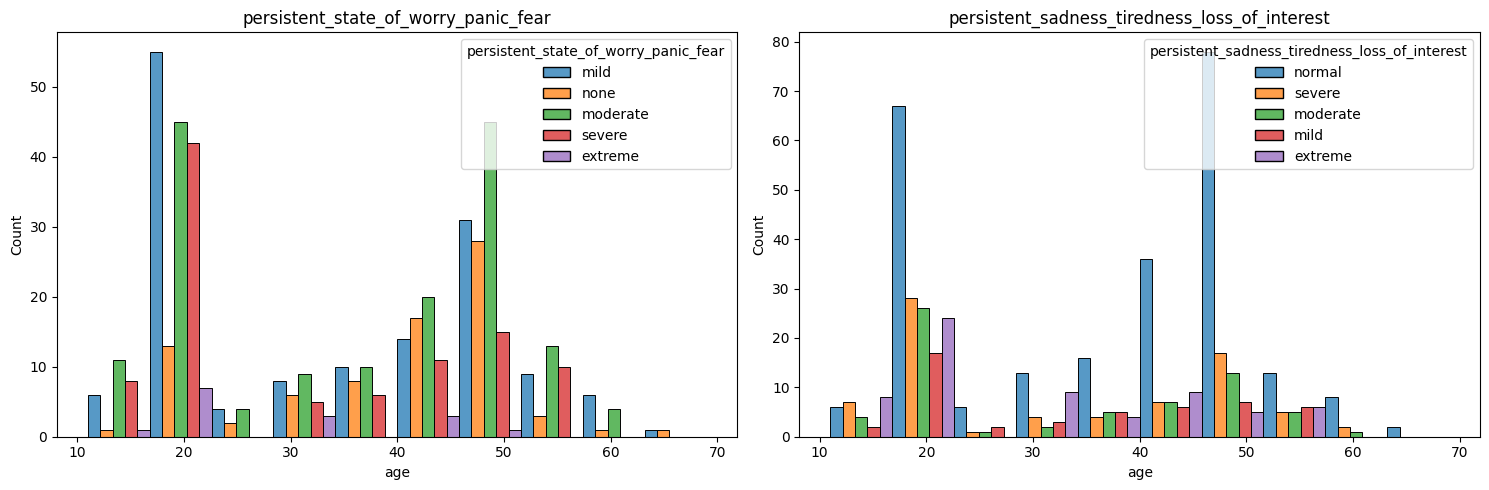

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'age', hue = 'persistent_state_of_worry_panic_fear', multiple='dodge')
plt.title('persistent_state_of_worry_panic_fear')
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'age', hue = 'persistent_sadness_tiredness_loss_of_interest', multiple='dodge')
plt.title('persistent_sadness_tiredness_loss_of_interest')
plt.tight_layout();

**Inferences:**

From this plot we infer that most people of the age group 15-17 show mild or moderate worry/panic/fear levels. Whereas people of the age group 20-23 show more instances of severe worry/panic/fear.

The people of the age group 15-17 & 45-50 show normal sadness/tiredness/loss of interest levels. Whereas people of the age group 20-23 show more instances of severe sadness/tiredness/loss of interest.

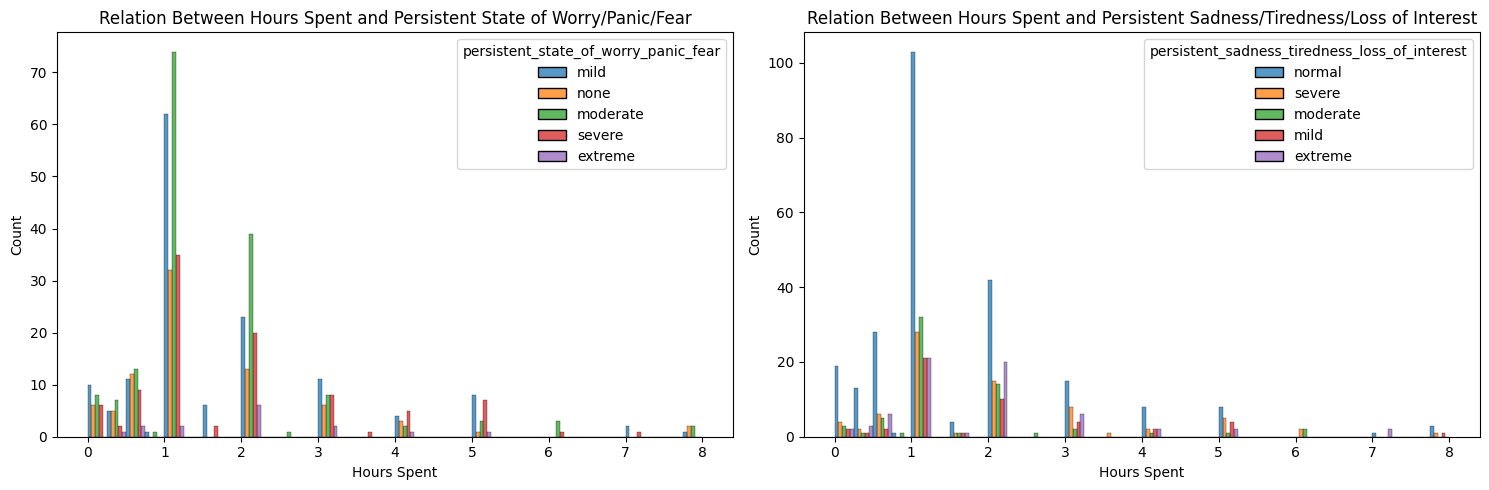

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'hours_spent', hue = 'persistent_state_of_worry_panic_fear', multiple='dodge')
plt.xlabel("Hours Spent")
plt.title('Relation Between Hours Spent and Persistent State of Worry/Panic/Fear')
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'hours_spent', hue = 'persistent_sadness_tiredness_loss_of_interest', multiple='dodge')
plt.xlabel("Hours Spent")
plt.title('Relation Between Hours Spent and Persistent Sadness/Tiredness/Loss of Interest')
plt.tight_layout();

**Inferences:**

From this plot we infer that most people who listen to music for around 1 hour show mild or moderate worry/panic/fear levels. Whereas people who listen to music for around 5 hours show more instances of severe worry/panic/fear.

The people who listen to music for around 1 hour show normal sadness/tiredness/loss of interest levels. Whereas people who listen to music for around 5 hours show more instances of severe sadness/tiredness/loss of interest.

In [ ]:
fig = px.bar(df['music_effects'].value_counts(), x=df['music_effects'].value_counts().index, y=df['music_effects'].value_counts().values
             , color_discrete_sequence=['salmon'])
fig.update_layout(title='Bar Plot for Effects of Music ', xaxis_title='Categories', yaxis_title='Count')
fig.show()

In [ ]:
value_counts_df = df['music_effects'].value_counts().reset_index()
value_counts_df.columns = ['music_effects', 'count']

fig = px.bar(value_counts_df, x='music_effects', y='count', color='music_effects',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Update the layout
fig.update_layout(title='Bar Plot for music_effects', xaxis_title='Categories', yaxis_title='Count')

# Add frequency count on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Show the plot
fig.show()

**Inference:**

This plot helps us recognize that most of the people from our survey say that Music improves their mental state (439 out of 497, 88.329% of people).

In [ ]:
fig = px.bar(df['primary_streaming_platform'].value_counts(), x=df['primary_streaming_platform'].value_counts().index, y=df['primary_streaming_platform'].value_counts().values
             ,color=df['primary_streaming_platform'].value_counts().index, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title='Bar Plot for Primary Streaming Platform ', xaxis_title='Categories', yaxis_title='Count')
fig.show()

In [ ]:
value_counts_df = df['primary_streaming_platform'].value_counts().reset_index()
value_counts_df.columns = ['primary_streaming_platform', 'count']

fig = px.bar(value_counts_df, x='primary_streaming_platform', y='count', color='primary_streaming_platform',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Update the layout
fig.update_layout(title='Bar Plot for primary_streaming_platform', xaxis_title='Categories', yaxis_title='Count')

# Add frequency count on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Show the plot
fig.show()

**Inferences:**

This plot helps us recognize that most of the people (234 out of 497, 47.08%) people use Spotify as their primary music streaming platform.

This position is followed by Youtube (178 out of 497, 35.81% of people).

**Bar Plot of Hours Spent by individuals according to Age**

In [ ]:
fig = px.bar(df, x='age', y='hours_spent')

# Update the layout
fig.update_layout(title='Bar Plot of Hours Spent by different Ages', xaxis_title='Age', yaxis_title='Hours Spent')

# Show the plot
fig.show()


**Inferences:**

On hovering over the plot, we get to examine the hours spent by each age data point listening to music per day.

We infer that most people of the age 18-19 spend the maximum number of hours listening to music.

In [ ]:
fig = px.scatter(df, x='age', y='hours_spent')

# Update the layout
fig.update_layout(title='Scatter Plot of Hours Spent by different Ages', xaxis_title='Age', yaxis_title='Hours Spent')

# Show the plot
fig.show()

**Inferences:**

This Scatter Plot Between Hours spent listeing to music and Age helps us infer that most of the people from all age groups listen to music for an average of 1 hour everyday.

### **Box Plots**

**Box Plot of Hours Spent by Age**

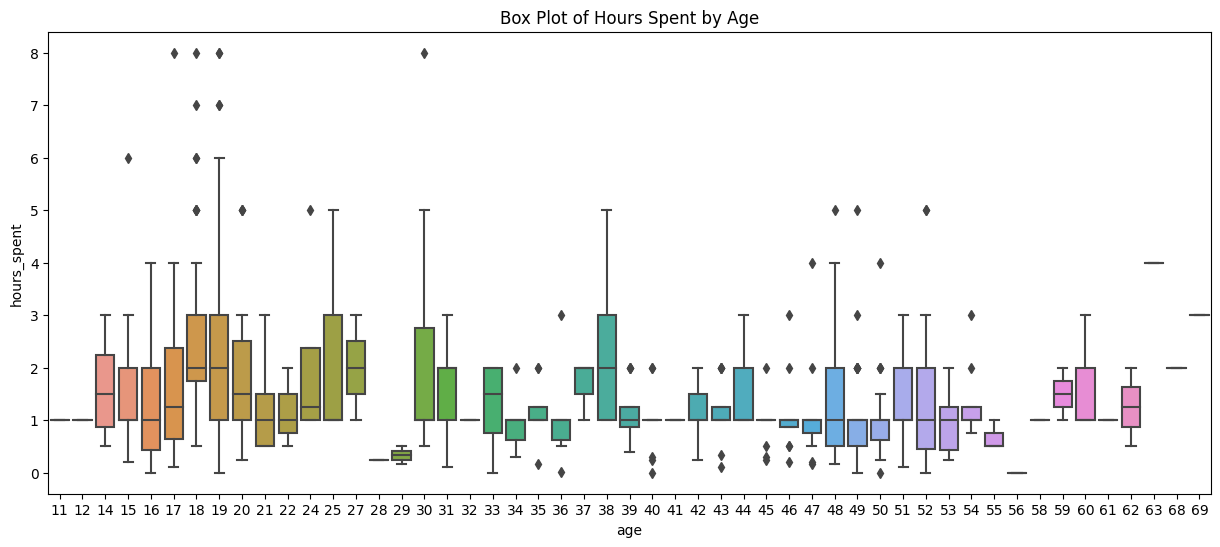

In [ ]:
plt.figure(figsize = (15,6))
sns.boxplot(x="age", y="hours_spent",data=df)
plt.title('Box Plot of Hours Spent by Age')
plt.show()

**Inferences:**

From this plot we understand the distribution and pattern of hours spent by people of various age groups. We can identify the outliers for each age group. The places we see only a dash signifies only one input for that age.

In [ ]:
fig = go.Figure(go.Box(x=df["age"], y=df["hours_spent"], boxpoints='all', jitter=0.3, pointpos=-1.8))

# Update the layout
fig.update_layout(title='Box Plot of Hours Spent by Age', xaxis_title='Age', yaxis_title='Hours Spent')

# Show the plot
fig.show()

Using the plotly plot we can interactively see the quartiles and other values such as max, min, upper fence and lower fence, along with their values for each box plot.

**Box Plot of Hours Spent on Music Streaming Platforms by People**

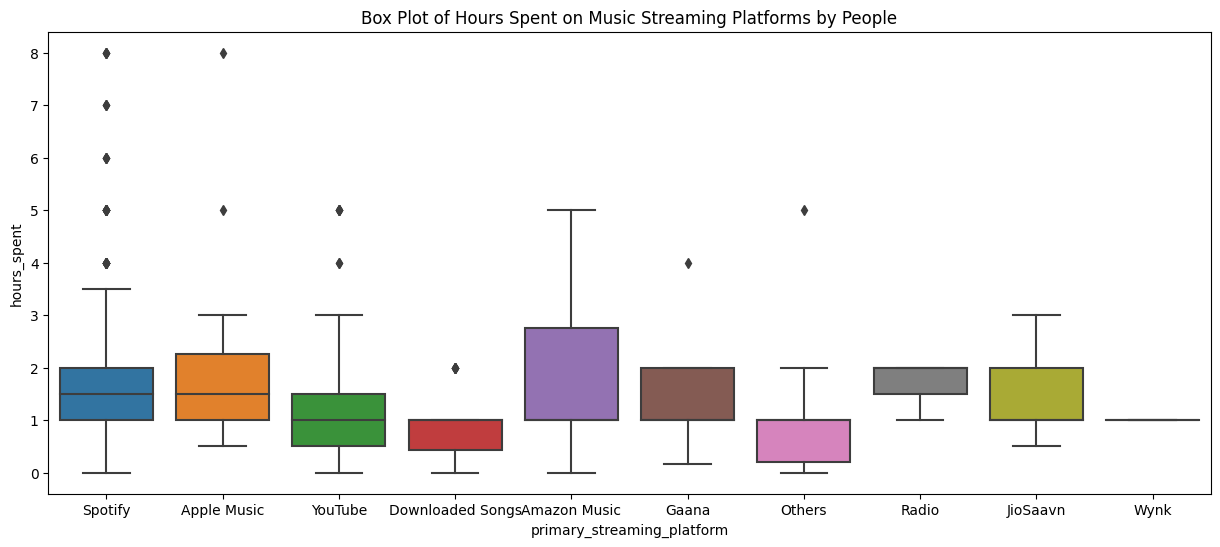

In [ ]:
plt.figure(figsize = (15,6))
sns.boxplot(x="primary_streaming_platform", y="hours_spent",data=df)
plt.title('Box Plot of Hours Spent on Music Streaming Platforms by People')
plt.show()

In [ ]:
fig = go.Figure(go.Box(x=df["primary_streaming_platform"], y=df["hours_spent"], boxpoints='all', jitter=0.3, pointpos=-1.8))

# Update the layout
fig.update_layout(title='Box Plot of Hours Spent on Music Streaming Platforms by People', xaxis_title='Primary Streaming Platform', yaxis_title='Hours Spent')

# Show the plot
fig.show()

**Inferences:**

This Plot gives a little business insight for these music streaming platforms. As we can see that spotify has a lot of outliers, indicating that people who listen to music for a larger period of time prefer Spotify.

**Box Plot Of favorite genre according to age**

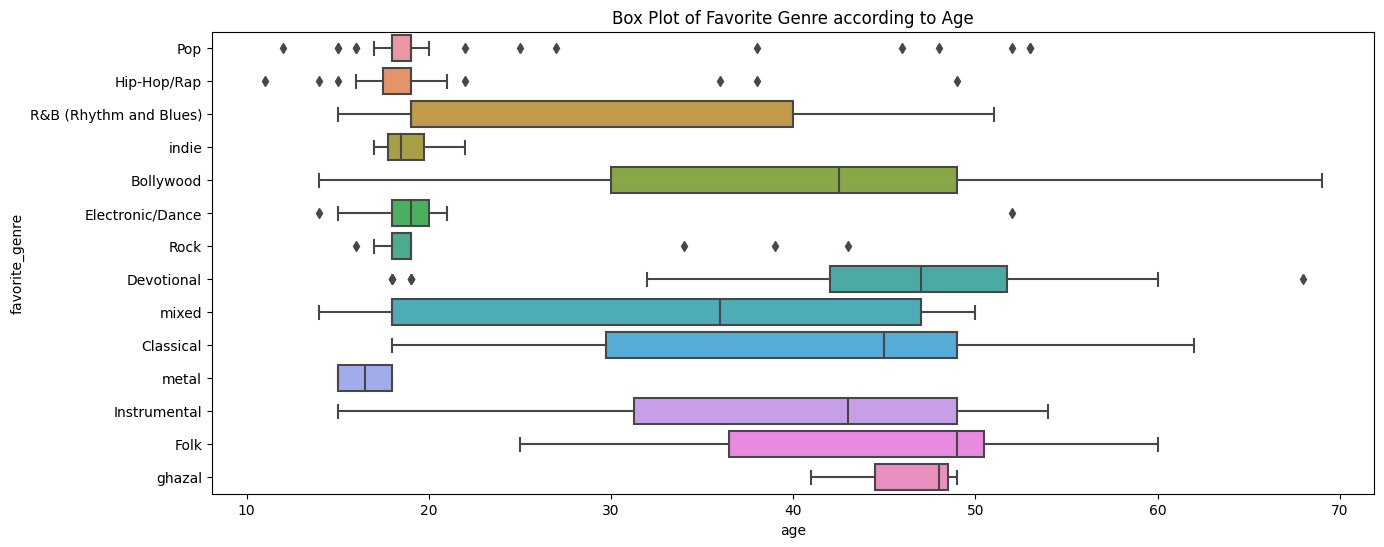

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="age", y="favorite_genre", data=df)
plt.title("Box Plot of Favorite Genre according to Age")
plt.show()

In [ ]:
fig = go.Figure(go.Box(y=df["age"], x=df["favorite_genre"], boxpoints='all', jitter=0.3, pointpos=-1.8))

# Update the layout
fig.update_layout(title='Box Plot of Favorite Genre according to Age', xaxis_title='Age', yaxis_title='Favorite Genre')

# Show the plot
fig.show()

**Inferences:**

We see that people belonging to the age-group of 15-20 have Pop, Hip-Hop/Rap, R&B, Indie, Electronic/Dance, Rock and Metal as their favourite genres. While people belonging to the age-group of 40-60 have Devotional, Classical, Folk and Ghazal as their favourite genre. There are definitely anomolies to this general description as seen by the points outside the upper or lower whiskers in the box plot.

We also see that Bollywood and R&B genres are seen to be applealing a wide range of ages.

### **Bar Plots**

**Bar plot for Different Genres of Music**

In [ ]:
fig = make_subplots(rows=2, cols=3, subplot_titles=('Pop', 'Bollywood', 'Hip-Hop/Rap', 'Rock', 'Devotional', 'Classical'))

# Add traces
fig.add_trace(go.Bar(x=df['Pop'].value_counts().index, y=df['Pop'].value_counts().values,  marker=dict(color=px.colors.qualitative.Pastel)), row=1, col=1)
fig.add_trace(go.Bar(x=df['Bollywood'].value_counts().index, y=df['Bollywood'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=1, col=2)
fig.add_trace(go.Bar(x=df['Hip-Hop/Rap'].value_counts().index, y=df['Hip-Hop/Rap'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=1, col=3)
fig.add_trace(go.Bar(x=df['Rock'].value_counts().index, y=df['Rock'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=2, col=1)
fig.add_trace(go.Bar(x=df['Devotional'].value_counts().index, y=df['Devotional'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=2, col=2)
fig.add_trace(go.Bar(x=df['Classical'].value_counts().index, y=df['Classical'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=2, col=3)

# Update layout
fig.update_layout(showlegend=False)
fig.update_xaxes(title_text="Like/Not-Like Pop", row=1, col=1)
fig.update_xaxes(title_text="Like/Not-Like Bollywood", row=1, col=2)
fig.update_xaxes(title_text="Like/Not-Like Hip-Hop/Rap", row=1, col=3)
fig.update_xaxes(title_text="Like/Not-Like Rock", row=2, col=1)
fig.update_xaxes(title_text="Like/Not-Like Devotional", row=2, col=2)
fig.update_xaxes(title_text="Like/Not-Like Classical", row=2, col=3)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=3)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)
fig.update_yaxes(title_text="Count", row=2, col=3)

# Show the plot
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=3, subplot_titles=('Instrumental', 'R&B (Rhythm and Blues)', 'Folk', 'Electronic/Dance', 'No other genres'))

# Add traces
fig.add_trace(go.Bar(x=df['Instrumental'].value_counts().index, y=df['Instrumental'].value_counts().values,  marker=dict(color=px.colors.qualitative.Pastel)), row=1, col=1)
fig.add_trace(go.Bar(x=df['R&B (Rhythm and Blues)'].value_counts().index, y=df['R&B (Rhythm and Blues)'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=1, col=2)
fig.add_trace(go.Bar(x=df['Folk'].value_counts().index, y=df['Folk'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=1, col=3)
fig.add_trace(go.Bar(x=df['Electronic/Dance'].value_counts().index, y=df['Electronic/Dance'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=2, col=1)
fig.add_trace(go.Bar(x=df['No other genres'].value_counts().index, y=df['No other genres'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=2, col=2)

# Update layout
fig.update_layout(showlegend=False)
fig.update_xaxes(title_text="Like/Not-Like Instrumental", row=1, col=1)
fig.update_xaxes(title_text="Like/Not-Like R&B (Rhythm and Blues)", row=1, col=2)
fig.update_xaxes(title_text="Like/Not-Like Folk", row=1, col=3)
fig.update_xaxes(title_text="Like/Not-Like Electronic/Dance", row=2, col=1)
fig.update_xaxes(title_text="Like/Not-Like No other genres", row=2, col=2)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=3)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)

# Show the plot
fig.show()

**Inferences:**

From these Plots, we get to know how many people like(1) and Not like(0) the particular genres.

We can observe the exact numbers by hovering over the bars of the individual plots.

The most liked genre is Bollywood (182) followed by Instrumental (170).

**Bar Plots for Different Languages**

In [ ]:
fig = make_subplots(rows=2, cols=3, subplot_titles=('Punjabi', 'Spanish', 'Korean', 'Tamil', 'Telegu', 'Malayalam'))

# Add traces
fig.add_trace(go.Bar(x=df['Punjabi'].value_counts().index, y=df['Punjabi'].value_counts().values,  marker=dict(color=px.colors.qualitative.Pastel)), row=1, col=1)
fig.add_trace(go.Bar(x=df['Spanish'].value_counts().index, y=df['Spanish'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=1, col=2)
fig.add_trace(go.Bar(x=df['Korean'].value_counts().index, y=df['Korean'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=1, col=3)
fig.add_trace(go.Bar(x=df['Tamil'].value_counts().index, y=df['Tamil'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=2, col=1)
fig.add_trace(go.Bar(x=df['Telegu'].value_counts().index, y=df['Telegu'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=2, col=2)
fig.add_trace(go.Bar(x=df['Malayalam'].value_counts().index, y=df['Malayalam'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=2, col=3)

# Update layout
fig.update_layout(showlegend=False)
fig.update_xaxes(title_text="Listen/Don't Listen to Punjabi Songs", row=1, col=1)
fig.update_xaxes(title_text="Listen/Don't Listen to Spanish Songs", row=1, col=2)
fig.update_xaxes(title_text="Listen/Don't Listen to Korean Songs", row=1, col=3)
fig.update_xaxes(title_text="Listen/Don't Listen to Tamil Songs", row=2, col=1)
fig.update_xaxes(title_text="Listen/Don't Listen to Telegu Songs", row=2, col=2)
fig.update_xaxes(title_text="Listen/Don't Listen to Malayalam Songs", row=2, col=3)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=3)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)
fig.update_yaxes(title_text="Count", row=2, col=3)

# Show the plot
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=3, subplot_titles=('French', 'Portugese', 'Chinese',' ', 'No other language'))

# Add traces
fig.add_trace(go.Bar(x=df['French'].value_counts().index, y=df['French'].value_counts().values,  marker=dict(color=px.colors.qualitative.Pastel)), row=1, col=1)
fig.add_trace(go.Bar(x=df['Portugese'].value_counts().index, y=df['Portugese'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=1, col=2)
fig.add_trace(go.Bar(x=df['Chinese'].value_counts().index, y=df['Chinese'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=1, col=3)
fig.add_trace(go.Bar(x=df['No other language'].value_counts().index, y=df['No other language'].value_counts().values, marker=dict(color=px.colors.qualitative.Pastel)), row=2, col=2)

# Update layout
fig.update_layout(showlegend=False)
fig.update_xaxes(title_text="Listen/Don't Listen to French Songs", row=1, col=1)
fig.update_xaxes(title_text="Listen/Don't Listen to Portugese Songs", row=1, col=2)
fig.update_xaxes(title_text="Listen/Don't Listen to Chinese Songs", row=1, col=3)
fig.update_xaxes(title_text="Listen to No other language Songs (1-no other lang.)", row=2, col=2)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=3)
fig.update_yaxes(title_text="Count", row=2, col=2)

# Show the plot
fig.show()

**Inferences:**

From these Plots, we get to know how many people Listen(1) and Don't Listen(0) other language songs.

The last plot shows us that many people listen to some or the other language songs as well. 1 denotes people who don't listen to other languages, which is lesser.

We can observe the exact numbers by hovering over the bars of the individual plots.

This inference along with the previous observation shows that although Bollywood is the favorite genre of many people, but these people listen to other languages (other than Hindi/English) as well.

**Bar Plot for Favourite Genre**

In [ ]:
value_counts_df = df['favorite_genre'].value_counts().reset_index()
value_counts_df.columns = ['favorite_genre', 'count']

fig = px.bar(value_counts_df, x='favorite_genre', y='count', color='favorite_genre',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Update the layout
fig.update_layout(title='Bar Plot for Favorite Genre', xaxis_title='Categories', yaxis_title='Count')

# Add frequency count on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Show the plot
fig.show()

**Bar Plot for Favorite Genre with how often people explore other genre**

In [ ]:
fig = px.bar(df, x="favorite_genre", color="explore_genres", barmode="group")

# Update the layout
fig.update_layout(title="Bar Plot for Favorite Genre with how often people explore other genre", xaxis_title="Favorite Genre", yaxis_title="Count")

# Show the plot
fig.show()

**Inferences:**

From this plot we can infer how often people listen and explore genres other than their favourite ones.

Here we see that although Bollywood has the maximum fanbase, it also has most of its audience exploring other genres frequently. Yet Bollywood remains the favourite.

**Bar Plot for Hours Spent vs Age (while working or not)**

In [ ]:
fig = px.bar(df, x="age", y="hours_spent", color="music_while_working", barmode="group")

# Update the layout
fig.update_layout(title="Bar Plot for Hours Spent vs Age (while working or not)", xaxis_title="Age", yaxis_title="Hours Spent")

# Show the plot
fig.show()

**Inferences:**

We infer from the above plot that people of the age group 15-20 are more likely to listen to music while working as compared to other people, hence their hours of listening to music is more as well.

In [ ]:
fig = px.bar(df, x="favorite_genre", color="persistent_state_of_worry_panic_fear", barmode="group")

# Update the layout
fig.update_layout(title="Bar Plot of Favourite Genre Count ", xaxis_title="Favorite Genre", yaxis_title="Count")

# Show the plot
fig.show()

**Inference:**

Majority of people with Moderate level of worry/panic/fear listen to Bollywood genre.

In [ ]:
fig = px.bar(df, x="favorite_genre", color="persistent_sadness_tiredness_loss_of_interest", barmode="group")

# Update the layout
fig.update_layout(title="Bar Plot of Favourite Genre Count ", xaxis_title="Favorite Genre", yaxis_title="Count")

# Show the plot
fig.show()

**Inference:**

Majority of people with normal level of sadness/tiredness/loss of interest listen to Bollywood genre.

In [ ]:
df.columns

Index(['Timestamp', 'age', 'primary_streaming_platform', 'hours_spent',
       'music_while_working', 'favorite_genre', 'explore_genres',
       'other_genres', 'other_languages', 'anxiety_level', 'depression_level',
       'insomnia_level', 'ocd_level', 'music_effects', 'Pop', 'Bollywood',
       'Hip-Hop/Rap', 'Rock', 'Devotional', 'Classical', 'Instrumental',
       'R&B (Rhythm and Blues)', 'Folk', 'Electronic/Dance', 'No other genres',
       'Punjabi', 'Spanish', 'Korean', 'Tamil', 'Telegu', 'Malayalam',
       'French', 'Portugese', 'Chinese', 'No other language',
       'persistent_state_of_worry_panic_fear',
       'persistent_sadness_tiredness_loss_of_interest'],
      dtype='object')

### **Violin Plots**

**Violin Plot of Favorite Genre according to Age**

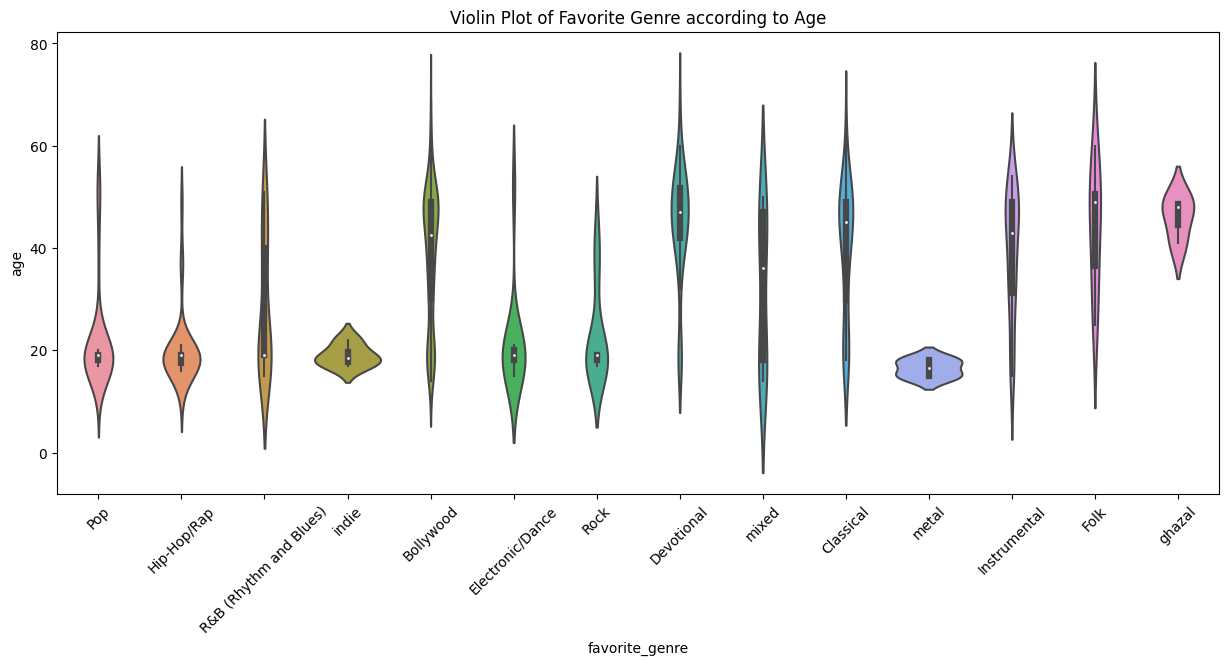

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.violinplot(x="favorite_genre", y="age", data=df)
plt.title("Violin Plot of Favorite Genre according to Age")

# Rotate the x-axis tick labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

**Inferences:**

The violin plot, shows the distribution of data. For example we see that most of the people who have their favorite genre as "Pop" are within the age group of 15-25. We could make this observation due to the spread of the violin plot around the values of 20.

**Violin Plot of Primary Streaming Platform according to Hours Spent**

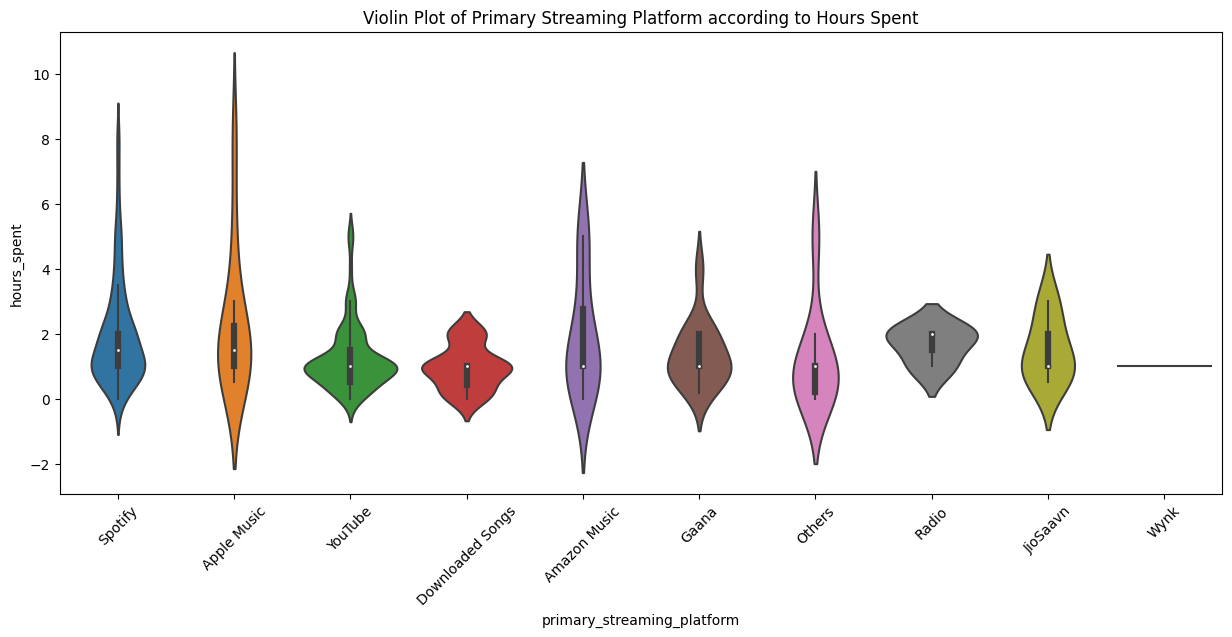

In [ ]:
#primary_streaming_platform

plt.figure(figsize=(15, 6))
ax = sns.violinplot(x="primary_streaming_platform", y="hours_spent", data=df)
plt.title("Violin Plot of Primary Streaming Platform according to Hours Spent")

# Rotate the x-axis tick labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Inferences:**

This plot shows us how the distribution of streaming platforms w.r.t hours spent by people on them is.

We see that people who listen music on Wynk have the similar number of hours they spend on listening to music, hence there is not much of a distribution. Whereas for other streaming platforms we see a distribution along a more wide time span (hours spent).

# Mental Health Practitioners Dataset

In [ ]:
dfs = pd.read_csv("/content/drive/MyDrive/EDA+DPL/Final_practitioners.csv")
dfs.head()

,Unnamed: 0.1,Unnamed: 0,name,age,gender,title,languages,qualifications,contact,address,...,bengali,marathi,marwari,rajasthani,urdu,konkani,assamese,oriya,spanish,french
0,0,0,Gaurav Kulkarni,30-39,male,Psychiatrist,"english, marathi",MBBS MD,9987545314,NaN,...,0,1,0,0,0,0,0,0,0,0
1,1,1,Dr Bharat Shah,40-49,male,Psychiatrist,"english, hindi, gujarati",M.D.,9821074495,Shushrut and Lilavati Hospitals,...,0,0,0,0,0,0,0,0,0,0
2,2,2,Manik Bhadkamkar,20-29,male,Clinical Psychologist,"english, hindi and marathi","B.A. Psychology, M.A. Psychology and M.Phil. C...",9987142188,INHS Asvini hospital. Colaba,...,0,1,0,0,0,0,0,0,0,0
3,3,3,Pushpa Venkatraman,40-49,male,Counsellor/Psychotherapist,"english, hindi","Masters in psychology, EMDR trained therapist",919869332886,"Private clinic, mulund",...,0,0,0,0,0,0,0,0,0,0
4,4,4,Dr Manjiri Deshpande Shenoy,30-39,male,Psychiatrist,"english, marathi, hindi","MBBS, DNB, PDF",9820330802,Indlas Child Guidance Clinic,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
del dfs['Unnamed: 0']
del dfs['Unnamed: 0.1']

In [ ]:
dfs.shape

(409, 28)

In [ ]:
fig = px.bar(dfs, x="location", color="gender", barmode="group")

# Update the layout
fig.update_layout(title="Bar Plot for Location by Gender", xaxis_title="Locations", yaxis_title="Count")

# Show the plot
fig.show()

**Inference:**
- There are close to none female mental health professionals in our country.

In [ ]:
fig = px.bar(dfs, x="location", color="age", barmode="group")

# Update the layout
fig.update_layout(title="Bar Plot for Location by age", xaxis_title="Locations", yaxis_title="Count")

# Show the plot
fig.show()

**Inference:**
- We can see that most of the mental health professionals in each location belong to the age group 20-29. Thus showing the generation gap in mental health awareness and acceptance.

In [ ]:
dfs.columns

Index(['name', 'age', 'gender', 'title', 'languages', 'qualifications',
       'contact', 'address', 'location', 'english', 'hindi', 'punjabi',
       'telegu', 'tamil', 'malayalam', 'kannada', 'gujarati', 'sindhi',
       'bengali', 'marathi', 'marwari', 'rajasthani', 'urdu', 'konkani',
       'assamese', 'oriya', 'spanish', 'french'],
      dtype='object')

In [ ]:
# Reshape the DataFrame for the stacked bar chart
dfsstack = dfs.melt(id_vars='location', value_vars=['english', 'hindi', 'punjabi',
       'telegu', 'tamil', 'malayalam', 'kannada', 'gujarati', 'sindhi',
       'bengali', 'marathi', 'marwari', 'rajasthani', 'urdu', 'konkani',
       'assamese', 'oriya', 'spanish', 'french'],
var_name='language', value_name='count')

# Create the stacked bar chart
fig = px.bar(dfsstack, x='location', y='count', color='language', title='Language Distribution by Location')

# Show the chart
fig.show()

**Inference:**
- The most frequently spoken language by professionals in each location is English followed by Hindi and the regional language.
- The 4th most spoken language in Mumbai is Gujarati.